In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load trade tracker data

In [93]:
trade_tracker = pd.read_csv('../results/backtest_trades.csv').iloc[:, 1:]

In [94]:
trade_tracker

,Buy Price,Buy Timestamp,Sell Price,Sell Timestamp,Buy Volume,Buy MA20,Buy STD20
0,10.435635,2009-07-01 00:00:00,10.321313,2009-07-10 00:00:00,92778458.0,10.530081,0.276361
1,10.174115,2009-07-02 00:00:00,10.567889,2009-07-13 00:00:00,101081463.0,10.490492,0.267204
2,10.202010,2009-07-06 00:00:00,10.577603,2009-07-14 00:00:00,90843231.0,10.447266,0.237377
3,9.878722,2009-07-07 00:00:00,10.913344,2009-07-15 00:00:00,130860666.0,10.394788,0.241420
4,10.024675,2009-07-08 00:00:00,11.023681,2009-07-16 00:00:00,138163938.0,10.353530,0.229790
5,10.221438,2009-07-09 00:00:00,NaN,NaN,131515110.0,10.325871,0.208768
6,11.282959,2009-09-02 00:00:00,NaN,NaN,72462593.0,11.417218,0.200688


# Add calculated columns for analysis

In [95]:
trade_tracker["Trade Profit"] = trade_tracker['Sell Price'] - trade_tracker['Buy Price']
trade_tracker["Winner"] = trade_tracker['Trade Profit'] > 0
trade_tracker["Loser"] = trade_tracker['Trade Profit'] <= 0

# Calculate post-analysis statistics

In [96]:
max_drawdown = trade_tracker['Trade Profit'].min()
win_loss_ratio = trade_tracker['Winner'].sum() / trade_tracker['Loser'].sum()
avg_trade_profit = trade_tracker['Trade Profit'].mean()
print(f"Max Drawdown: {max_drawdown}")
print(f"Win/Loss Ratio: {win_loss_ratio}")
print(f"Average Trade Profit: {avg_trade_profit}")

Max Drawdown: -0.11432170867919922
Win/Loss Ratio: 4.0
Average Trade Profit: 0.5377346038818362


# Plot distribution of Buy Volume with Winners and Losers

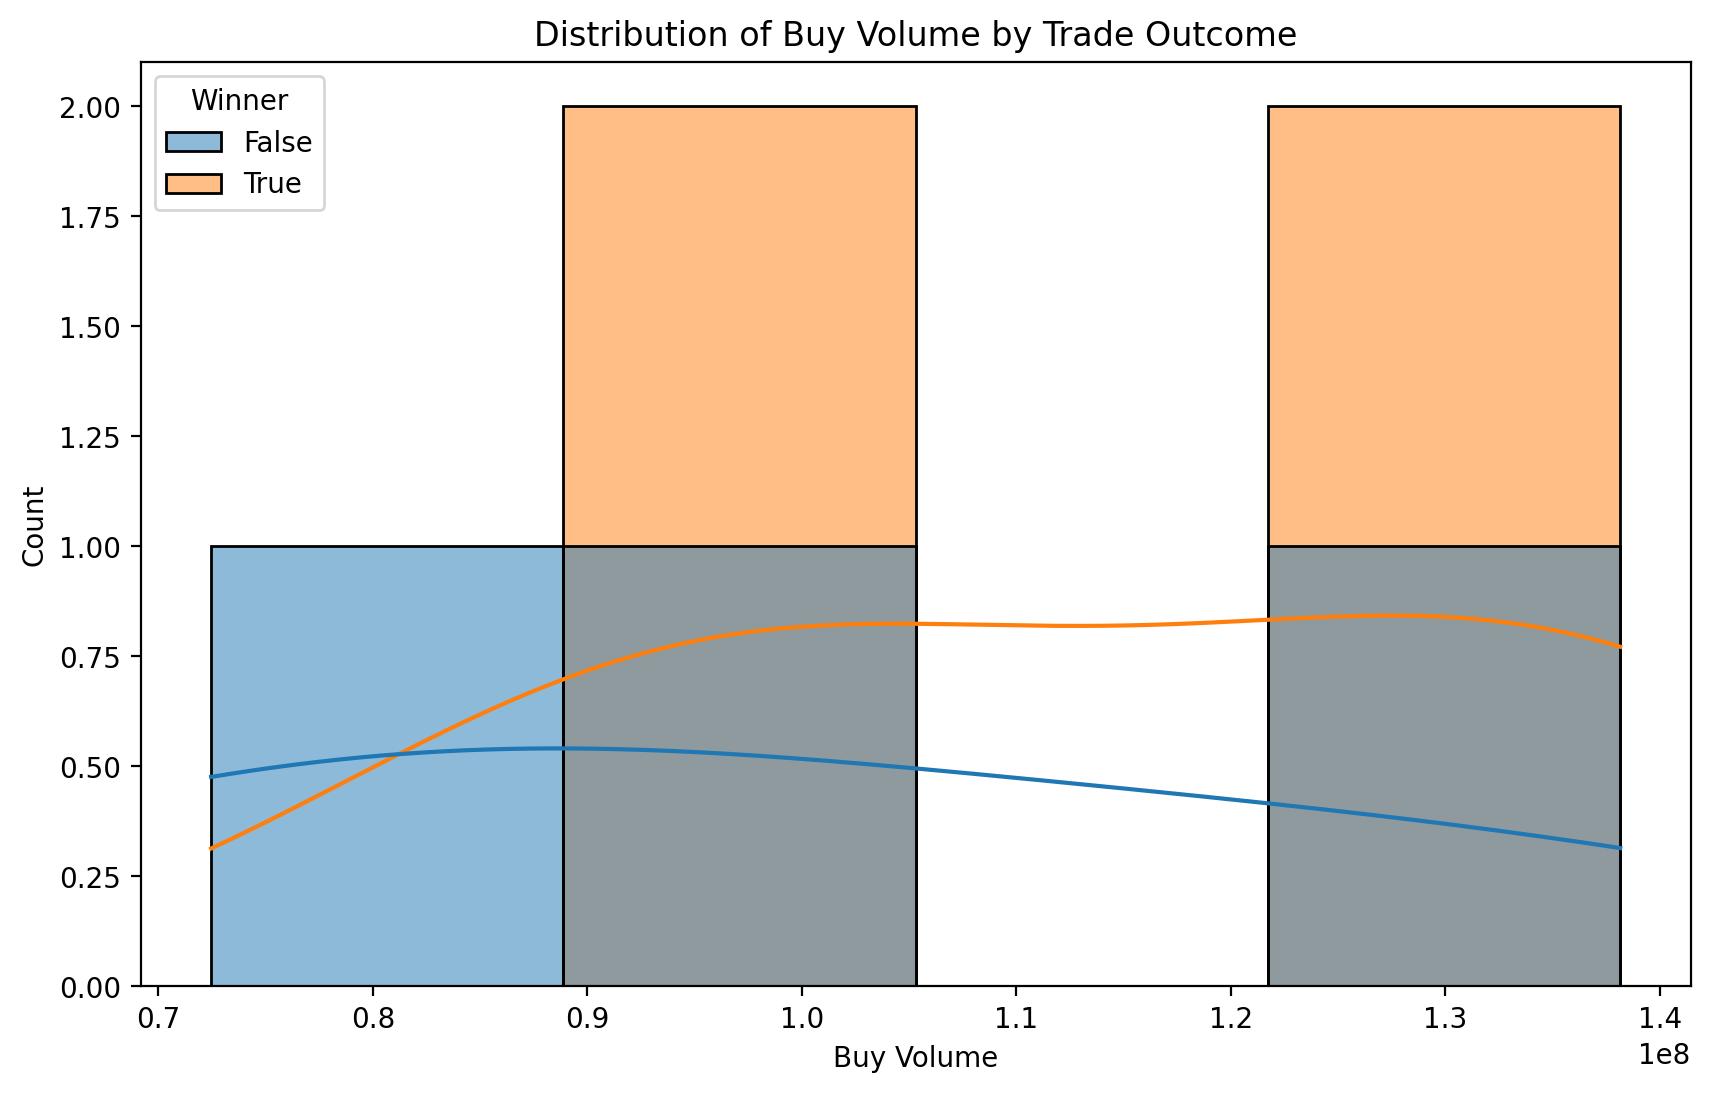

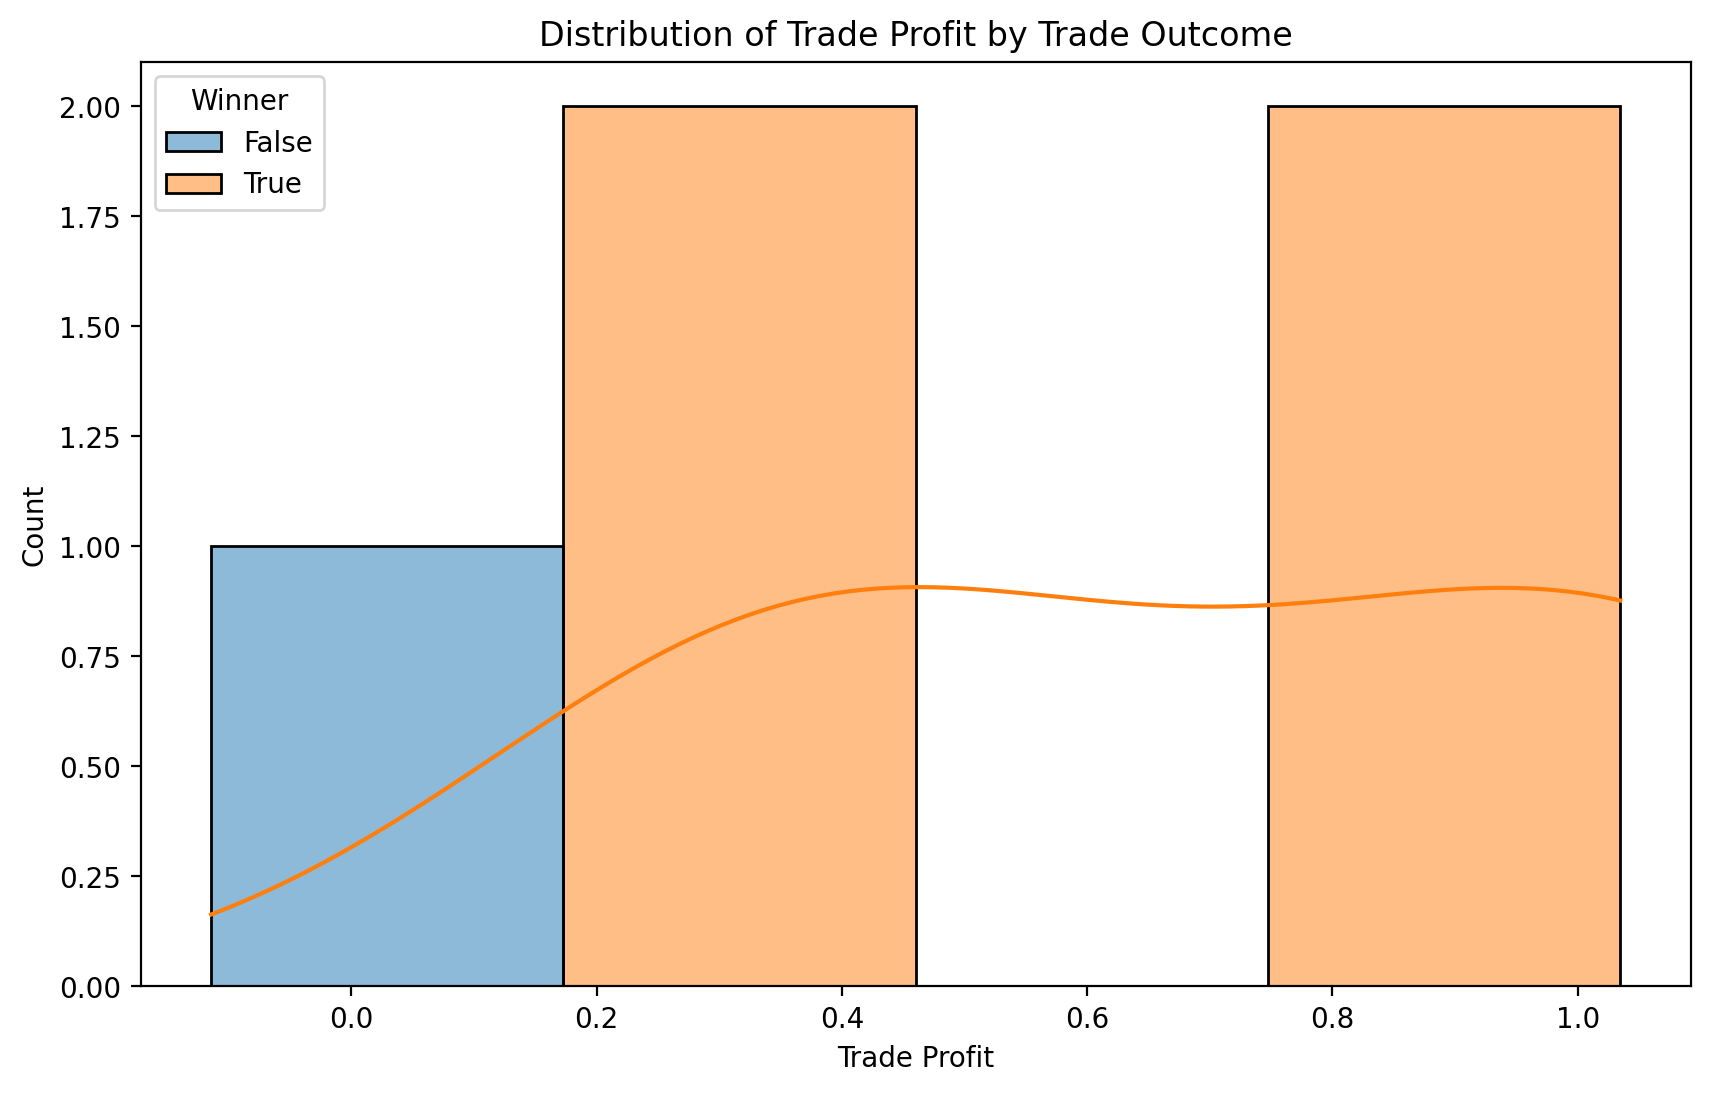

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=trade_tracker,
    x="Buy Volume",
    hue="Winner",
    alpha=0.5,
    kde=True
)
plt.title("Distribution of Buy Volume by Trade Outcome")
plt.show()

# Plot distribution of Trade Profit
plt.figure(figsize=(10, 6))
sns.histplot(
    data=trade_tracker,
    x="Trade Profit",
    hue="Winner",
    alpha=0.5,
    kde=True
)
plt.title("Distribution of Trade Profit by Trade Outcome")
plt.show()